<h1>About Dataset</h1>


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tpot import TPOTClassifier
import joblib 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(f"this data has  {df.shape[0]} of rows and {df.shape[1]} of columns ..classes in this data is :{df.Class.value_counts()} this {df.Class.value_counts()[0]}It represents the number of legitimate transactions and {df.Class.value_counts()[1]} Represent the number of fraudulent transactions")

this data has  284807 of rows and 31 of columns ..classes in this data is :0    284315
1       492
Name: Class, dtype: int64 this 284315It represents the number of legitimate transactions and 492 Represent the number of fraudulent transactions


print (f" per of legitimate transactions is  {(df.Class.value_counts()[0]/df.shape[0])*100}% and per of of fraudulent transactions is  :{(df.Class.value_counts()[1]/df.shape[0])*100}% ")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

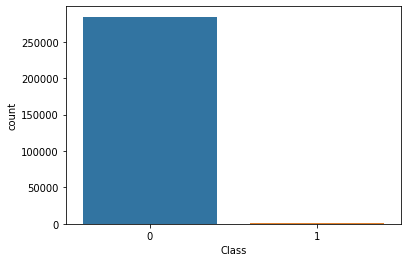

In [6]:
sns.countplot(x='Class', data=df)

In [7]:
df.columns[df.isna().any()]

Index([], dtype='object')

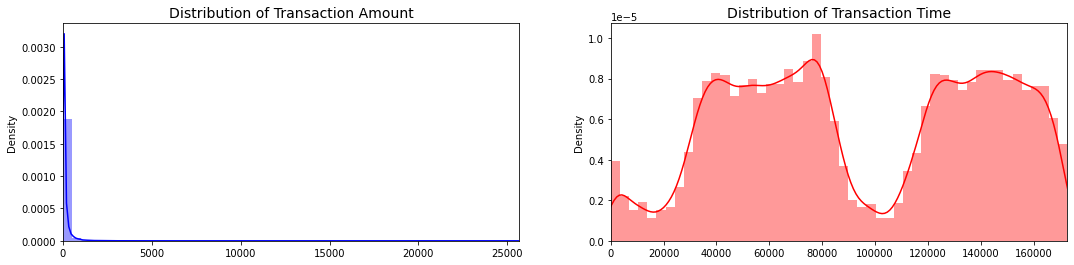

In [8]:
ig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

<AxesSubplot:ylabel='Density'>

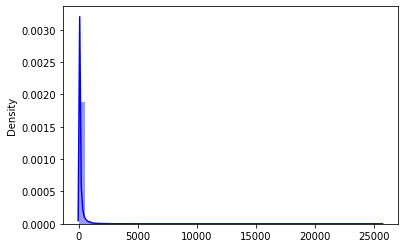

In [9]:
sns.distplot(amount_val, color='b')


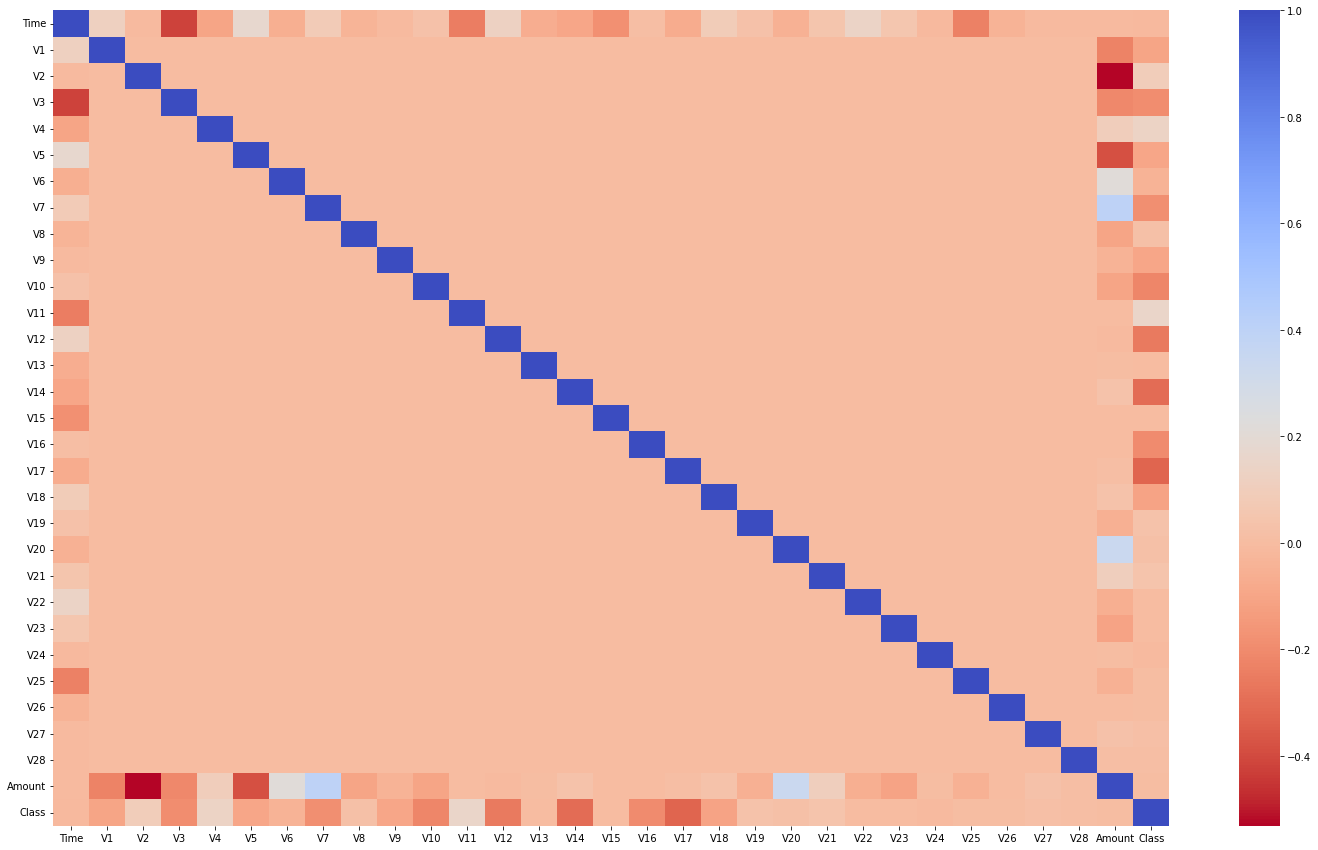

In [10]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20});

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We note from the drawing that the data is unbalanced and most of the data descend towards the legal transactions. Let us take samples from the legal and illegal transactions in the same proportions to achieve balance and train the model on them

In [12]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
legit_S= legit.sample(480)
fraud_S= fraud.sample(480)

In [14]:
fraud_S.shape[0]

480

<h5>Now we'll work with balanced </h5>

In [15]:
b_df = pd.concat([legit_S,fraud_S],axis=0 )

In [16]:
b_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260322,159500.0,-2.574043,-1.791565,2.320170,-2.034457,0.113439,-0.286806,-1.223947,-0.531313,-0.492569,...,0.969499,1.134865,0.936232,-0.324260,0.822857,0.011852,0.365446,-0.176769,7.60,0
89773,62716.0,-1.290449,1.289952,1.983024,0.399587,0.261020,-0.269042,-0.902256,-2.933331,-0.498935,...,-1.522134,-0.250292,-0.856076,0.526904,-0.402730,0.147978,-0.310226,-0.260582,9.86,0
98999,66913.0,1.479118,-0.802927,0.251049,-1.420287,-1.271145,-1.045146,-0.621939,-0.239740,-2.468087,...,-0.494346,-1.114402,0.216334,0.472919,0.193382,-0.559728,0.008691,0.012282,14.94,0
96378,65744.0,1.227716,-0.150021,-0.898214,0.319432,1.971917,3.813593,-0.666014,0.935136,0.414686,...,-0.129330,-0.297202,-0.144492,1.019098,0.857412,-0.284083,0.040500,0.017910,16.00,0
224670,143910.0,1.892835,-0.497683,-1.548864,0.053924,0.338612,-0.149827,0.203976,-0.244705,0.899907,...,-0.137411,-0.348725,0.044107,0.090694,0.062800,-0.095132,-0.041717,-0.033999,115.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226814,144808.0,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,667.55,1
8335,11131.0,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.00,1
220725,142280.0,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,...,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.59,1
102782,68357.0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59,1


In [17]:
b_df.Class.value_counts()


0    480
1    480
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

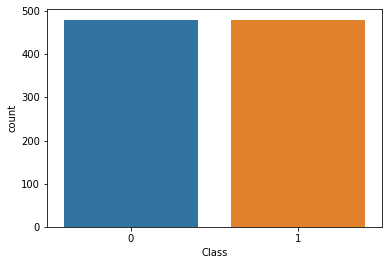

In [18]:
sns.countplot(x="Class" ,data=b_df)

In [19]:
b_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95739.13125,-0.015172,-0.089318,-0.027665,-0.014289,-0.001182,0.030262,0.018945,-0.085726,0.025853,...,-0.021702,0.037158,0.028390,-0.060311,-0.017720,0.005793,0.031421,-0.012796,0.024597,99.418000
1,80578.70000,-4.782023,3.606227,-7.057582,4.529395,-3.156752,-1.415444,-5.572428,0.615293,-2.573679,...,0.392059,0.654760,0.035895,-0.054670,-0.106274,0.043369,0.048627,0.174407,0.072040,122.968063


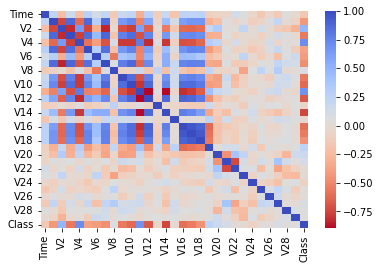

In [20]:
sns.heatmap(b_df.corr(), cmap='coolwarm_r', annot_kws={'size':20});


look at the diffrence correlation between imbalanced df and balanced df
Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

V17, V14, V12, V10 are negative correlated to Class let's visualize those features V2, V4, V19, V11 are Positive correlated to Class let's visualize those features

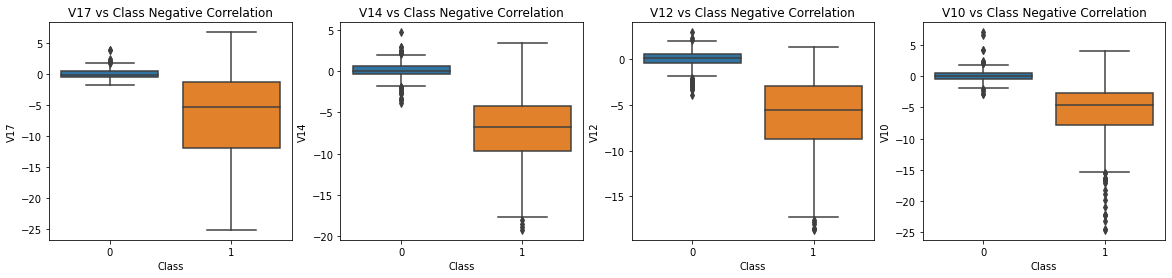

In [21]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=b_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=b_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=b_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=b_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

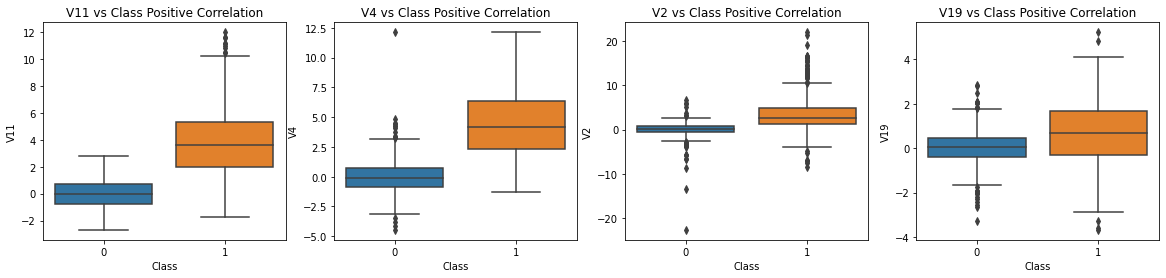

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=b_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=b_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=b_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=b_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

<h1> Feature Scaling </h1>

In [23]:
std_scaler = StandardScaler()
b_df['scaled_amount'] = std_scaler.fit_transform(b_df['Amount'].values.reshape(-1,1))
b_df['scaled_time'] = std_scaler.fit_transform(b_df['Time'].values.reshape(-1,1))
b_df = b_df.drop(["Amount", "Time"],axis=1)

In [24]:
b_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
260322,-2.574043,-1.791565,2.320170,-2.034457,0.113439,-0.286806,-1.223947,-0.531313,-0.492569,0.040578,...,1.134865,0.936232,-0.324260,0.822857,0.011852,0.365446,-0.176769,0,-0.376629,1.495426
89773,-1.290449,1.289952,1.983024,0.399587,0.261020,-0.269042,-0.902256,-2.933331,-0.498935,0.318234,...,-0.250292,-0.856076,0.526904,-0.402730,0.147978,-0.310226,-0.260582,0,-0.368413,-0.533325
98999,1.479118,-0.802927,0.251049,-1.420287,-1.271145,-1.045146,-0.621939,-0.239740,-2.468087,1.596821,...,-1.114402,0.216334,0.472919,0.193382,-0.559728,0.008691,0.012282,0,-0.349943,-0.445349
96378,1.227716,-0.150021,-0.898214,0.319432,1.971917,3.813593,-0.666014,0.935136,0.414686,-0.064957,...,-0.297202,-0.144492,1.019098,0.857412,-0.284083,0.040500,0.017910,0,-0.346090,-0.469853
224670,1.892835,-0.497683,-1.548864,0.053924,0.338612,-0.149827,0.203976,-0.244705,0.899907,-0.309124,...,-0.348725,0.044107,0.090694,0.062800,-0.095132,-0.041717,-0.033999,0,0.015150,1.168634


<h1>Feature Engineering</h1>


In [25]:
FEATURES = [col for col in b_df.columns if col not in ['Class']]
b_df["mean"] = b_df[FEATURES].mean(axis=1)
b_df["std"] = b_df[FEATURES].std(axis=1)
b_df["min"] = b_df[FEATURES].min(axis=1)
b_df["max"] = b_df[FEATURES].max(axis=1)

In [26]:
#Assign Feature and Target variables

In [27]:
X = b_df.drop('Class', axis=1)
y = b_df.Class

In [28]:
b_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,scaled_amount,scaled_time,mean,std,min,max
260322,-2.574043,-1.791565,2.320170,-2.034457,0.113439,-0.286806,-1.223947,-0.531313,-0.492569,0.040578,...,0.011852,0.365446,-0.176769,0,-0.376629,1.495426,-0.041400,1.111630,-2.574043,2.354844
89773,-1.290449,1.289952,1.983024,0.399587,0.261020,-0.269042,-0.902256,-2.933331,-0.498935,0.318234,...,0.147978,-0.310226,-0.260582,0,-0.368413,-0.533325,-0.060656,1.002647,-2.933331,1.983024
98999,1.479118,-0.802927,0.251049,-1.420287,-1.271145,-1.045146,-0.621939,-0.239740,-2.468087,1.596821,...,-0.559728,0.008691,0.012282,0,-0.349943,-0.445349,-0.158652,0.875355,-2.468087,1.596821
96378,1.227716,-0.150021,-0.898214,0.319432,1.971917,3.813593,-0.666014,0.935136,0.414686,-0.064957,...,-0.284083,0.040500,0.017910,0,-0.346090,-0.469853,0.205895,0.916740,-0.898214,3.813593
224670,1.892835,-0.497683,-1.548864,0.053924,0.338612,-0.149827,0.203976,-0.244705,0.899907,-0.309124,...,-0.095132,-0.041717,-0.033999,0,0.015150,1.168634,0.047206,0.728629,-1.548864,1.892835


In [29]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,scaled_amount,scaled_time,mean,std,min,max
260322,-2.574043,-1.791565,2.320170,-2.034457,0.113439,-0.286806,-1.223947,-0.531313,-0.492569,0.040578,...,0.822857,0.011852,0.365446,-0.176769,-0.376629,1.495426,-0.041400,1.111630,-2.574043,2.354844
89773,-1.290449,1.289952,1.983024,0.399587,0.261020,-0.269042,-0.902256,-2.933331,-0.498935,0.318234,...,-0.402730,0.147978,-0.310226,-0.260582,-0.368413,-0.533325,-0.060656,1.002647,-2.933331,1.983024
98999,1.479118,-0.802927,0.251049,-1.420287,-1.271145,-1.045146,-0.621939,-0.239740,-2.468087,1.596821,...,0.193382,-0.559728,0.008691,0.012282,-0.349943,-0.445349,-0.158652,0.875355,-2.468087,1.596821
96378,1.227716,-0.150021,-0.898214,0.319432,1.971917,3.813593,-0.666014,0.935136,0.414686,-0.064957,...,0.857412,-0.284083,0.040500,0.017910,-0.346090,-0.469853,0.205895,0.916740,-0.898214,3.813593
224670,1.892835,-0.497683,-1.548864,0.053924,0.338612,-0.149827,0.203976,-0.244705,0.899907,-0.309124,...,0.062800,-0.095132,-0.041717,-0.033999,0.015150,1.168634,0.047206,0.728629,-1.548864,1.892835


In [30]:
y.head()

260322    0
89773     0
98999     0
96378     0
224670    0
Name: Class, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [32]:
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")


We have 720 Training data
We have 240 Testing data


<h1> Modeling </h1>

In [33]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_svm = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
def save(model, model_name):
    joblib.dump(model, model_name)
    print("Model Saved Succesfully")

<h1>Logistic Regression <h1>


In [34]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 94.0625%
Logistic Regression model score on Training data: 95.97222222222223%
Logistic Regression model score on Testing data: 93.75%


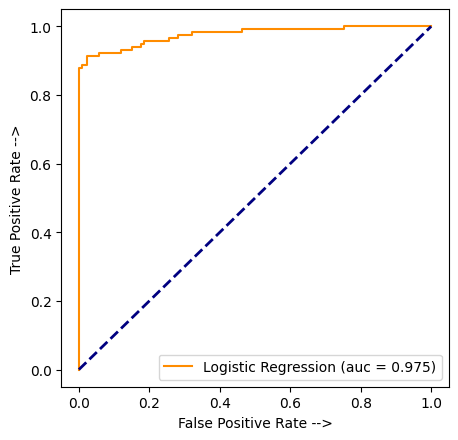

In [35]:
roc(lr_model, "Logistic Regression")

<h1>Random Forest</h1>


In [36]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 93.22916666666667%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 93.75%


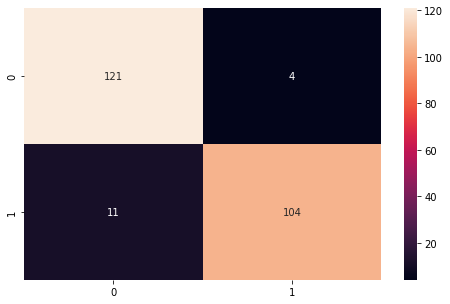

In [37]:
conf_matrix(rf_model)

In [38]:
class_report(rf_model)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       125
           1       0.96      0.90      0.93       115

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



<h1>KNN</h1>

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 93.54166666666669%
KNN model score on Training data: 95.13888888888889%
KNN model score on Testing data: 94.58333333333333%


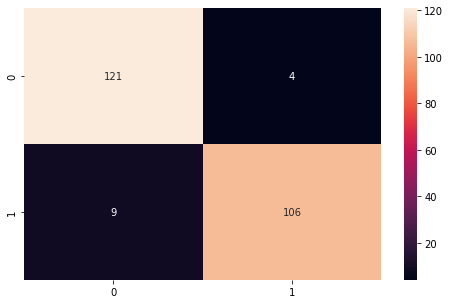

In [40]:
conf_matrix(knn_model)


In [41]:
class_report(knn_model)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       125
           1       0.96      0.92      0.94       115

    accuracy                           0.95       240
   macro avg       0.95      0.94      0.95       240
weighted avg       0.95      0.95      0.95       240



<h1>Decision Tree </h1>


In [42]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 90.9375%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 90.83333333333333%


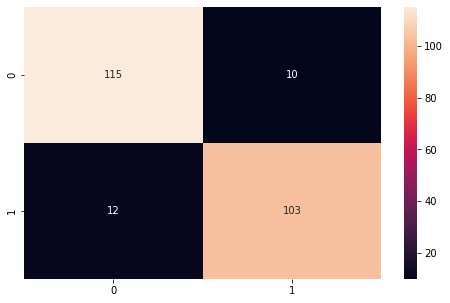

In [43]:
conf_matrix(dt_model)


In [44]:
class_report(dt_model)


              precision    recall  f1-score   support

           0       0.91      0.92      0.91       125
           1       0.91      0.90      0.90       115

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



<h1> SVM </h1>

In [45]:
svm_model = SVC(kernel='linear', gamma='auto')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 93.75%
SVM model score on Training data: 96.25%
SVM model score on Testing data: 93.33333333333333%


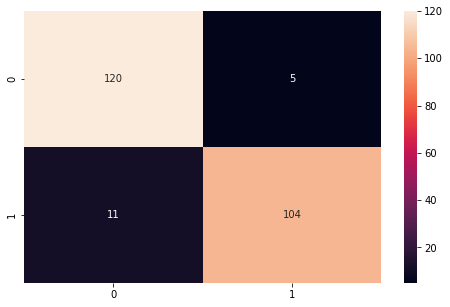

In [46]:
conf_matrix(svm_model)

In [47]:
class_report(svm_model)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       125
           1       0.95      0.90      0.93       115

    accuracy                           0.93       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



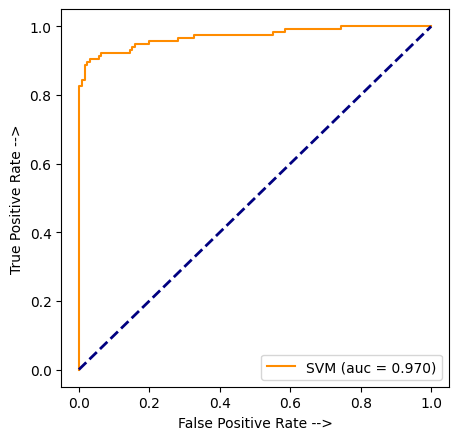

In [48]:
roc(svm_model, "SVM")


<h4>Logistic Regression is the best acc <h4>
    <h2> Save the Model </h2>

In [49]:
save(lr_model, "Logistic Regression")

Model Saved Succesfully
